## Hospital_Readmission( Final Submission)

### By Swarnabh Kashyap

### Problem Statement:
- To predict the early readmission of hospital patients following discharge from hospitals within a 30 day period.

## Setting up the environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Reading Data 

In [3]:
#Reading data into training and test dataset
train=pd.read_csv("diabetic_data_train.csv",header=0)
test=pd.read_csv("diabetic_data_test.csv",header=0)
ID_mapping_date = pd.read_csv("IDs_mapping.csv")


## Data Exploration
##### Dataset Description

- Encounter ID: Unique identifier of an encounter
- Patient number: Unique identifier of a patient
- Race Values: Caucasian, Asian, African American, Hispanic, and other
- Gender Values: male, female, and unknown/invalid
- Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
- Weight: Weight in pounds
- Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
- Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
- Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- Time in hospital: Integer number of days between admission and discharge
- Payer code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
- Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
- Number of lab procedures: Number of lab tests performed during the encounter
- Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter
- Number of medications: Number of distinct generic names administered during the encounter
- Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter
- Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter
- Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter
- Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- Number of diagnoses : Number of diagnoses entered to the system 0%
- Glucose serum test : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
- A1c test result : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
- Change of medications : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
- Diabetes medications : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”. 24 features for medications. Names of medications: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
- Readmitted: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [4]:
# first five sample of train data
train.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,93634,338369606,159605546,AfricanAmerican,Male,[70-80),?,1,23,7,...,No,No,No,No,No,No,No,No,No,NO
1,27698,90739116,83232054,Caucasian,Female,[70-80),[75-100),3,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,17488,64286964,95117913,Caucasian,Male,[60-70),?,3,1,1,...,No,No,No,No,No,No,No,Ch,Yes,>30
3,96510,376610012,136697972,AfricanAmerican,Male,[40-50),?,3,1,1,...,No,No,No,No,No,No,No,No,No,NO
4,35774,110557278,2851308,Caucasian,Male,[80-90),?,1,1,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
# first five sample of test data
test.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,77011,233192070,110179728,Caucasian,Female,[80-90),?,1,3,7,...,No,No,No,No,No,No,No,Ch,Yes,>30
1,95048,356145692,40743441,Caucasian,Female,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,29619,96590916,235017,AfricanAmerican,Male,[70-80),?,2,1,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,85031,268888392,70368660,Caucasian,Male,[70-80),?,3,6,1,...,No,No,No,No,No,No,No,No,No,NO
4,13003,52253142,19835496,AfricanAmerican,Female,[70-80),?,3,18,1,...,No,No,No,No,No,No,No,Ch,Yes,NO


In [6]:
## first five sample of ID mapping data
ID_mapping_date.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [7]:
# general information of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76324 entries, 0 to 76323
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76324 non-null  int64 
 1   encounter_id              76324 non-null  int64 
 2   patient_nbr               76324 non-null  int64 
 3   race                      76324 non-null  object
 4   gender                    76324 non-null  object
 5   age                       76324 non-null  object
 6   weight                    76324 non-null  object
 7   admission_type_id         76324 non-null  int64 
 8   discharge_disposition_id  76324 non-null  int64 
 9   admission_source_id       76324 non-null  int64 
 10  time_in_hospital          76324 non-null  int64 
 11  payer_code                76324 non-null  object
 12  medical_specialty         76324 non-null  object
 13  num_lab_procedures        76324 non-null  int64 
 14  num_procedures        

In [8]:
#summary statistics of the numeric data in train set
train.describe()

,Unnamed: 0,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,76324.000000,7.632400e+04,7.632400e+04,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000
mean,51030.451431,1.657131e+08,5.440963e+07,2.020059,3.720992,5.751703,4.400084,43.136445,1.335163,16.025942,0.375046,0.200985,0.639432,7.423602
std,29364.017248,1.027571e+08,3.872523e+07,1.441786,5.289243,4.050886,2.985689,19.673383,1.701378,8.119375,1.291108,0.936242,1.273049,1.938609
min,0.000000,1.252200e+04,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25657.750000,8.548698e+07,2.341891e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,51050.500000,1.526763e+08,4.559911e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76428.250000,2.307394e+08,8.761871e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101765.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
# the datatypes of all the attributes for training data
train.dtypes

Unnamed: 0                   int64
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide      

In [10]:
# rows, columns of the train data
train.shape

(76324, 51)

In [11]:
# rows, columns of the test data
test.shape

(25442, 51)

#### Observations of the dataset

- Data set has 101766 records and total 50 features(combination of both train and test dataset)
- The target variable or label is readmitted. 
- 13 features are numerical features and 37 are categorical features.

## Data Visualization

### Visualizing the Gender,Age and Race attributes 

<AxesSubplot:xlabel='race', ylabel='count'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'AfricanAmerican'),
  Text(1, 0, 'Caucasian'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Other'),
  Text(4, 0, '?'),
  Text(5, 0, 'Asian')])

Text(0.5, 1.0, 'Number of Race values')

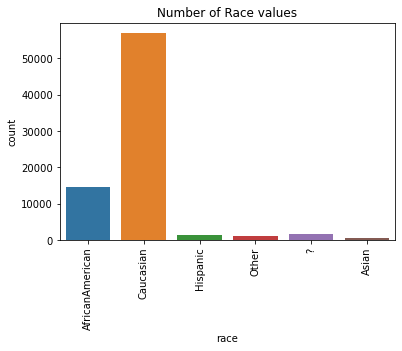

Proportion of Race
Caucasian          74.600388
AfricanAmerican    19.022850
?                   2.237828
Hispanic            1.988889
Other               1.519836
Asian               0.630208
Name: race, dtype: float64


In [12]:
# Finding counts of the different races
sns.countplot(x=train.race, data = train)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(train.race.value_counts(normalize = True)*100)

#### Observation
- Caucasian patients consitute 74 percent of the data.
- Second largest group is African Americans who constitute 19 percent of the data.
- And patients are divided into Hispanics, Asians and Others.

<AxesSubplot:xlabel='gender', ylabel='count'>

<AxesSubplot:xlabel='age', ylabel='count'>

<AxesSubplot:xlabel='race', ylabel='count'>

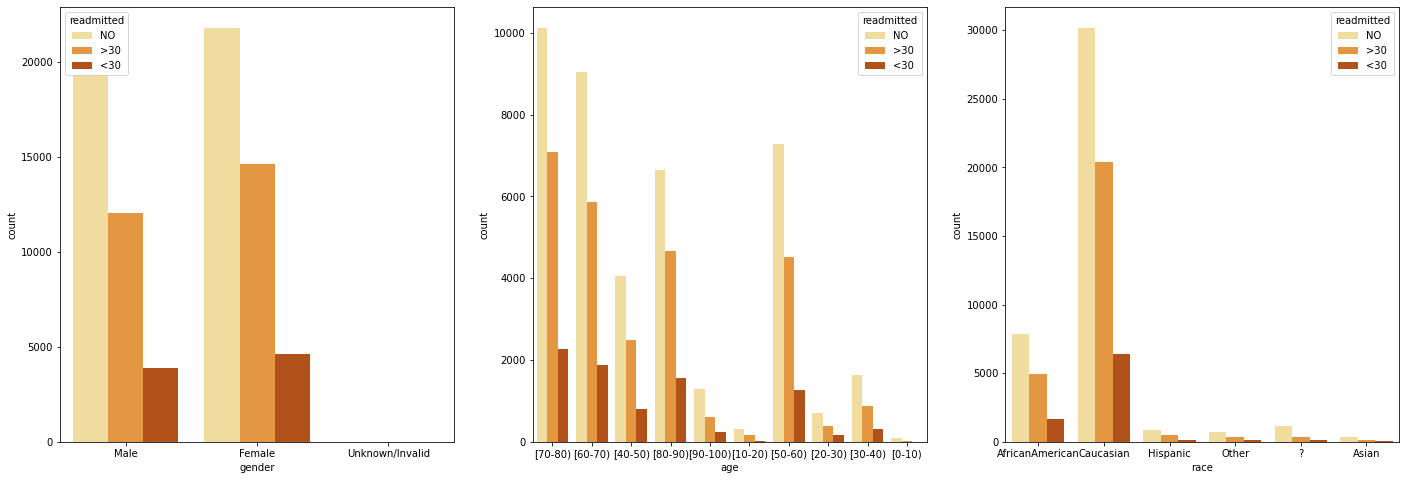

In [13]:
# I try to visualize the gender, age and race features wrt readmitted using a countplot
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(x=train[i], hue=train.readmitted, palette='YlOrBr', ax=ax[count]);
    count = count+1

#### Observations
- The probablity of a Caucasian being readmitted is higher followed by African Americans.
- Almost equal proportion of females and males.
- The chances of a female being readmitted is a little more than the males.
- We see that the age of the patients is on the higher side.(Elderly population).

<AxesSubplot:xlabel='time_in_hospital', ylabel='count'>

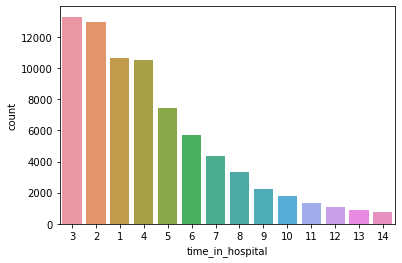

In [14]:
# visualizing the time in hospital feature
sns.countplot(x="time_in_hospital", data = train,
              order = train.time_in_hospital.value_counts().index)
plt.show()

#### Observation 
- Most of the patients stayed in the hospital for (1-4) days.
- some other visualizations have been done below.

## Data Preprocessing

#### Missing values handling

In [15]:
# ? mark denotes missing value so we will replace ? with nan. 
train.replace('?', np.nan , inplace=True)
test.replace('?', np.nan , inplace=True)

In [16]:
# we also replace the missing values in the race column with the mode of the column. 
train["race"].fillna(train["race"].mode()[0], inplace = True) 
test["race"].fillna(test["race"].mode()[0], inplace = True)

In [17]:
# Drop the samples in the data set which have 'Unknown/Invalid' values. There are just three such samples.
train.gender.replace('Unknown/Invalid', np.nan , inplace=True)
train.dropna(subset=['gender'], how='all', inplace = True)
test.gender.replace('Unknown/Invalid', np.nan , inplace=True)
test.dropna(subset=['gender'], how='all', inplace = True)
train.gender.value_counts()
test.gender.value_counts()

Female    41008
Male      35313
Name: gender, dtype: int64

Female    13700
Male      11742
Name: gender, dtype: int64

In [18]:
# checking the presence of null values in train and test data set. We can see that there 
# are still null values for weight, payer_code,medical_specialty,diag_1,diag_2,diag_3
# which will be handled subsequently.
train.isnull().sum()
test.isnull().sum()

Unnamed: 0                      0
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      73932
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  30047
medical_specialty           37480
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         20
diag_2                        276
diag_3                       1081
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

Unnamed: 0                      0
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      24634
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  10208
medical_specialty           12467
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          1
diag_2                         82
diag_3                        342
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [19]:
# The medicines citoglipton and examide have the same values for all encounters.
# Therefore we remove the two attributes from our dataset.
# Checking the fact that they have only one value for every encounter. 

train['citoglipton'].value_counts()
test['citoglipton'].value_counts()

No    76321
Name: citoglipton, dtype: int64

No    25442
Name: citoglipton, dtype: int64

In [20]:
# removing the citoglipton and examide attributes
# We also Remove the "Encounter ID" as it is just an ID.
# Due to high percentage of missing values we drop payer_code,medical_specialty and weight

train = train.drop(['Unnamed: 0','weight','payer_code','medical_specialty','encounter_id','citoglipton','examide'], axis = 1)
test = test.drop(['Unnamed: 0','weight','payer_code','medical_specialty','encounter_id','citoglipton','examide'], axis = 1)
train.info()
test.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 76321 entries, 0 to 76323
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               76321 non-null  int64 
 1   race                      76321 non-null  object
 2   gender                    76321 non-null  object
 3   age                       76321 non-null  object
 4   admission_type_id         76321 non-null  int64 
 5   discharge_disposition_id  76321 non-null  int64 
 6   admission_source_id       76321 non-null  int64 
 7   time_in_hospital          76321 non-null  int64 
 8   num_lab_procedures        76321 non-null  int64 
 9   num_procedures            76321 non-null  int64 
 10  num_medications           76321 non-null  int64 
 11  number_outpatient         76321 non-null  int64 
 12  number_emergency          76321 non-null  int64 
 13  number_inpatient          76321 non-null  int64 
 14  diag_1                

In [21]:
# We check the value counts of the readmitted attribute
# which tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.
train.groupby('readmitted').size()

readmitted
<30     8518
>30    26658
NO     41145
dtype: int64

In [22]:
# readmitted attribute has three values >30 and <30 and NO. So to convert into a binary classification problem
# we transform the values into 0 and 1. We consider the <30 values to be 1 and >30 and NO values to be 0. 
train.readmitted = [1 if each=='<30' else 0 for each in train.readmitted]
test.readmitted = [1 if each=='<30' else 0 for each in test.readmitted]

<AxesSubplot:xlabel='readmitted', ylabel='count'>

<AxesSubplot:ylabel='readmitted'>

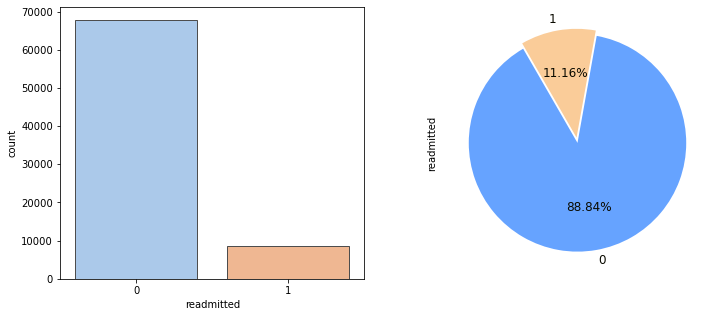

In [23]:
# Plotting the countplot of the readmitted attribute and the pie chart to show the percentage 
# of the readmitted paitients. From the pie chart plot we can see that 88.84 percent of the patients were not readmitted after 
# discharge.

fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=train.readmitted, data=train, palette="pastel",ax=ax[0], edgecolor=".3")
train.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

#### Observations
- 88.4 percent of the patients were either readmitted after 30 days or never readmitted
- Only 11.16 percent of the patients were readmitted within 30 days.

#### Grouping admission_type_id, admission_source_id, discharge_disposition_id and diag_1,diag_2,diag_3
- values into fewer categories

- Admission_type_id (from 8 to 4) {Critical, Others, Newborn, Elective}
- Admission_source_id ( from 26 to 3) {Emergency Room, Referral, Others}
- Discharge_disposition_id (from 29 to 2) {Home,Others}
- diag_1,diag_2,diag_3 values are ICD9 codes which refer to a particular category of diagnosis, so transformed these values to the category they belong to(Circulatory,Other,Respiratory,Digestive,Injury,Genitourinary,Musculoskeletal,Neoplasms,Diabetes).

In [24]:
# grouping admission_type_id values into fewer categories
# grouping done based on data present in ID_mappins.csv file
# The groups are the admission_type_id ((1,2,7),(5,6,8),3,4)

train['admission_type_id'] = train['admission_type_id'].replace(2,1)
train['admission_type_id'] = train['admission_type_id'].replace(7,1)
train['admission_type_id'] = train['admission_type_id'].replace(6,5)
train['admission_type_id'] = train['admission_type_id'].replace(8,5)
train["admission_type_id"].replace({1:'Critical'}, inplace = True)
train["admission_type_id"].replace({3:'Elective'}, inplace = True)
train["admission_type_id"].replace({4:'Newborn'}, inplace = True)
train["admission_type_id"].replace({5:'Others'}, inplace = True)

test['admission_type_id'] = test['admission_type_id'].replace(2,1)
test['admission_type_id'] = test['admission_type_id'].replace(7,1)
test['admission_type_id'] = test['admission_type_id'].replace(6,5)
test['admission_type_id'] = test['admission_type_id'].replace(8,5)

# Grouping done in the following format(1,2,7:'Critical',5,6,8:'Others',3:'Elective',4:'Newborn')
test["admission_type_id"].replace({1:'Critical'}, inplace = True)
test["admission_type_id"].replace({3:'Elective'}, inplace = True)
test["admission_type_id"].replace({4:'Newborn'}, inplace = True)
test["admission_type_id"].replace({5:'Others'}, inplace = True)
train['admission_type_id'].value_counts()

Critical    54427
Elective    14155
Others       7731
Newborn         8
Name: admission_type_id, dtype: int64

<AxesSubplot:xlabel='admission_type_id', ylabel='count'>

Text(0.5, 1.0, '-Distribution of Admission IDs-')

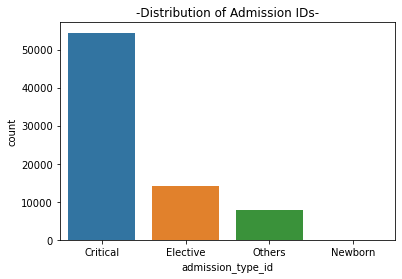

In [25]:
# visualizing the various admission_type_ids

sns.countplot(x = "admission_type_id", data = train)
plt.title("-Distribution of Admission IDs-")
plt.show()

# we see that most of the patients belong to the critical category.

In [26]:
# grouping admission_source_id values into fewer categories
# grouping done based on data present in ID_mappins.csv file
# The groups are the admission_source_id ((1,2,3),(4,5,6,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26),7)


train['admission_source_id'] = train['admission_source_id'].replace(2,1)
train['admission_source_id'] = train['admission_source_id'].replace(3,1)
train['admission_source_id'] = train['admission_source_id'].replace(5,4)
train['admission_source_id'] = train['admission_source_id'].replace(6,4)
train['admission_source_id'] = train['admission_source_id'].replace(8,4)
train['admission_source_id'] = train['admission_source_id'].replace(9,4)
train['admission_source_id'] = train['admission_source_id'].replace(10,4)
train['admission_source_id'] = train['admission_source_id'].replace(11,4)
train['admission_source_id'] = train['admission_source_id'].replace(12,4)
train['admission_source_id'] = train['admission_source_id'].replace(13,4)
train['admission_source_id'] = train['admission_source_id'].replace(14,4)
train['admission_source_id'] = train['admission_source_id'].replace(15,4)
train['admission_source_id'] = train['admission_source_id'].replace(17,4)
train['admission_source_id'] = train['admission_source_id'].replace(18,4)
train['admission_source_id'] = train['admission_source_id'].replace(19,4)
train['admission_source_id'] = train['admission_source_id'].replace(20,4)
train['admission_source_id'] = train['admission_source_id'].replace(21,4)
train['admission_source_id'] = train['admission_source_id'].replace(22,4)
train['admission_source_id'] = train['admission_source_id'].replace(23,4)
train['admission_source_id'] = train['admission_source_id'].replace(24,4)
train['admission_source_id'] = train['admission_source_id'].replace(25,4)
train['admission_source_id'] = train['admission_source_id'].replace(26,4)

test['admission_source_id'] = test['admission_source_id'].replace(2,1)
test['admission_source_id'] = test['admission_source_id'].replace(3,1)
test['admission_source_id'] = test['admission_source_id'].replace(5,4)
test['admission_source_id'] = test['admission_source_id'].replace(6,4)
test['admission_source_id'] = test['admission_source_id'].replace(8,4)
test['admission_source_id'] = test['admission_source_id'].replace(9,4)
test['admission_source_id'] = test['admission_source_id'].replace(10,4)
test['admission_source_id'] = test['admission_source_id'].replace(11,4)
test['admission_source_id'] = test['admission_source_id'].replace(12,4)
test['admission_source_id'] = test['admission_source_id'].replace(13,4)
test['admission_source_id'] = test['admission_source_id'].replace(14,4)
test['admission_source_id'] = test['admission_source_id'].replace(15,4)
test['admission_source_id'] = test['admission_source_id'].replace(17,4)
test['admission_source_id'] = test['admission_source_id'].replace(18,4)
test['admission_source_id'] = test['admission_source_id'].replace(19,4)
test['admission_source_id'] = test['admission_source_id'].replace(20,4)
test['admission_source_id'] = test['admission_source_id'].replace(21,4)
test['admission_source_id'] = test['admission_source_id'].replace(22,4)
test['admission_source_id'] = test['admission_source_id'].replace(23,4)
test['admission_source_id'] = test['admission_source_id'].replace(24,4)
test['admission_source_id'] = test['admission_source_id'].replace(25,4)
test['admission_source_id'] = test['admission_source_id'].replace(26,4)



In [27]:
# Grouping done in the following format((1,2,3):'Referral',(4,5,6,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26):'Others',7:'Emergency Room')
train["admission_source_id"].replace({1:'Referral'}, inplace = True)
train["admission_source_id"].replace({4:'Others'}, inplace = True)
train["admission_source_id"].replace({7:'Emergency Room'}, inplace = True)
test["admission_source_id"].replace({1:'Referral'}, inplace = True)
test["admission_source_id"].replace({4:'Others'}, inplace = True)
test["admission_source_id"].replace({7:'Emergency Room'}, inplace = True)
train['admission_source_id'].value_counts()

Emergency Room    43205
Referral          23096
Others            10020
Name: admission_source_id, dtype: int64

<AxesSubplot:xlabel='admission_source_id', ylabel='count'>

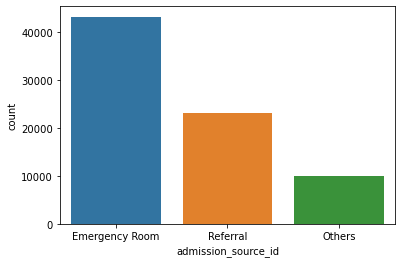

In [28]:
# visualizing the various source id's
sns.countplot(x ="admission_source_id", data = train)
plt.show()


#### Observation
- Most of the values belong to the Emergency Room category.

In [29]:
# From the IDs_mapping.csv provided, we can see that 11,13,14,19,20,21 are related to death or hospice.
# We remove these samples from the predictive model since these patients cannot be readmitted.

train = train.loc[~train.discharge_disposition_id.isin([11,13,14,19,20,21])]
test = test.loc[~test.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [30]:
# grouping discharge_disposition_id values into fewer categories
# grouping done based on data present in ID_mappins.csv file
# The groups are the admission_source_id ((1,6,8),(3,18,2,22,5,25,4,7,23,28,,15,24,9,16,17,10,27,12))


train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(6,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(8,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(3,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(18,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(22,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(5,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(25,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(4,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(7,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(23,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(28,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(15,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(24,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(9,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(16,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(17,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(10,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(27,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(12,2)
train['discharge_disposition_id'].value_counts()


1    54953
2    19588
Name: discharge_disposition_id, dtype: int64

In [31]:
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(6,1)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(8,1)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(3,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(18,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(22,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(5,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(25,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(4,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(7,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(23,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(28,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(15,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(24,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(9,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(16,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(17,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(10,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(27,2)
test['discharge_disposition_id'] = test['discharge_disposition_id'].replace(12,2)

# making sure that the values have been grouped properly
test['discharge_disposition_id'].value_counts()


1    18289
2     6510
Name: discharge_disposition_id, dtype: int64

In [32]:
# Grouping done in the following format((1,6,8):'Home',(3,18,2,22,5,25,4,7,23,28,,15,24,9,16,17,10,27,12):'Other')
train["discharge_disposition_id"].replace({1:'Home'}, inplace = True)
train["discharge_disposition_id"].replace({2:'Other'}, inplace = True)

test["discharge_disposition_id"].replace({1:'Home'}, inplace = True)
test["discharge_disposition_id"].replace({2:'Other'}, inplace = True)

# making sure that the values have been grouped properly in test dataset
test['discharge_disposition_id'].value_counts()

Home     18289
Other     6510
Name: discharge_disposition_id, dtype: int64

In [33]:
# making sure that the values have been grouped properly in train dataset
train['discharge_disposition_id'].value_counts()

Home     54953
Other    19588
Name: discharge_disposition_id, dtype: int64

<AxesSubplot:xlabel='discharge_disposition_id', ylabel='count'>

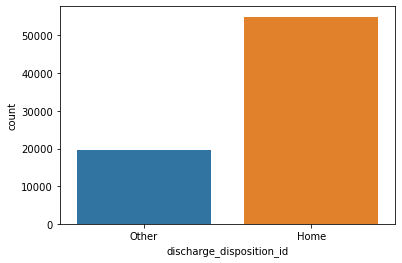

In [34]:
# visualizing the various discharge_disposition_ids
sns.countplot(x ="discharge_disposition_id", data = train)
plt.show()

In [35]:
# Transforming the diag_1,diag_2,diag_3 features.
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    train[col].fillna('NaN', inplace=True)  # filling all the missing values in the column with NaN, train
    test[col].fillna('NaN', inplace=True)  # filling all the missing values in the column with NaN, test

In [36]:
import re

# grouping diag_1,diag_2,diag_3 values into 9 categories. 

def transformFunc(value):
    #function to do regex matching on the value,
    value = re.sub("V[0-9]*", "0", value)  # for ICD codes containing with V, compute regex matching
    value = re.sub("E[0-9]*", "0", value)  # for ICD codes beginning with E, compute regex matching
    value = re.sub('NaN', "-1", value)  # for ICD codes containing NaN, compute regex matching
    return value

def transformCategory(value):
    #Return the category associated with value.
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'    # if value is between 390 and 459 or 785 category is Circulatory.
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    else :
        category = 'Other'

    return category  # return the associated category value.

In [37]:
# for each column in diag_list (diag_1,diag_2,diag_3)
for col in diag_list:
    train[col] = train[col].apply(transformFunc) #apply transform func to the column in train data
    train[col] = train[col].astype(float)   # convert the datatype of the column values into float
    test[col] = test[col].apply(transformFunc) #apply transform func to the column in test data
    test[col] = test[col].astype(float)   # convert the datatype of the column values into float

In [38]:
# for each column in diag_list (diag_1,diag_2,diag_3)
for col in diag_list:
    train[col] = train[col].apply(transformCategory) #apply transformCategory method to the column in train data
    test[col] = test[col].apply(transformCategory) #apply transformCategory method to the column in test data

In [39]:
# Checking the value counts of the diag_1 feature to make sure the diag_1 feature has been grouped properly.
train['diag_1'].value_counts()

Circulatory        22160
Other              19722
Respiratory        10498
Digestive           7010
Injury              5185
Genitourinary       3736
Musculoskeletal     3697
Neoplasms           2353
Diabetes             180
Name: diag_1, dtype: int64

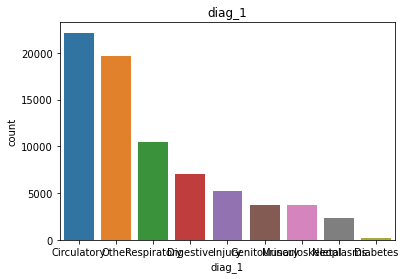

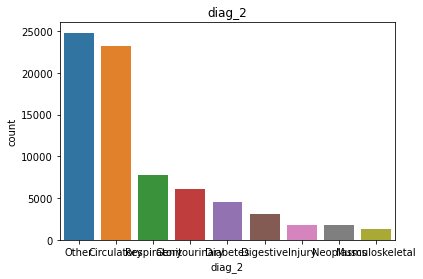

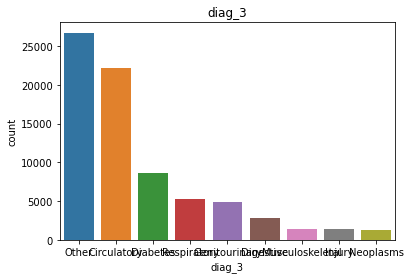

In [40]:
# visualizing the different category values of diag_1,diag_2,doag_3

def plotting_diag(c,data):
    sns.countplot(x = c, data = data,
            order = data[f"{c}"].value_counts().index)
    plt.title(c)
    plt.show()

diag_list = ["diag_1","diag_2","diag_3"]

for diag in diag_list:
    plotting_diag(diag,train)

In [41]:
# Also converted the age feature values into midpoint of the category the particular value belongs to.
train.age = train.age.replace({"[70-80)":75,  #midpoint of 70-80 is 75 , so replacing the catgeory with the midpoint value.
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

# doing the same conversion in test data too.
test.age = test.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

In [42]:
# dropping duplicate encounters for patients from train set.
train = train.drop_duplicates(subset=['patient_nbr'])

# checking the shapes of the two datasets after removing the duplicates
train.shape
test.shape

(55949, 44)

(24799, 44)

In [43]:
# Dropping the patient_nbr feature because it is just an ID and including it might
# give some weird results during prediction.
train = train.drop(['patient_nbr'], axis = 1)
test = test.drop(['patient_nbr'], axis = 1)
train.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55949 entries, 0 to 76323
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      55949 non-null  object
 1   gender                    55949 non-null  object
 2   age                       55949 non-null  int64 
 3   admission_type_id         55949 non-null  object
 4   discharge_disposition_id  55949 non-null  object
 5   admission_source_id       55949 non-null  object
 6   time_in_hospital          55949 non-null  int64 
 7   num_lab_procedures        55949 non-null  int64 
 8   num_procedures            55949 non-null  int64 
 9   num_medications           55949 non-null  int64 
 10  number_outpatient         55949 non-null  int64 
 11  number_emergency          55949 non-null  int64 
 12  number_inpatient          55949 non-null  int64 
 13  diag_1                    55949 non-null  object
 14  diag_2                

#### Encoding Categorical variables

##### Note
- Here I am encoding the categorical features of both the train and test dataset.
- Used three approaches(Manual encoding for some features, Encoding using LabelEncoder for a few features and OneHotEncoding
for the remaining categorical features. 
- Tried out different approaches.

In [44]:
# Approach 1) Manual encoding for some features
# Manually Encoding the values in the features which refer to various medications used by the the patients.
medicines = ['repaglinide', 'nateglinide','acetohexamide','chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose','metformin', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide']

# representing the values in the format('No':0,'Steady':1,'Up':1,'Down':1)
for c in medicines:
    train[c] = train[c].replace(['No','Steady','Up','Down'],[0,1,1,1])
    train[c] = train[c].astype(int)
    test[c] = test[c].replace(['No','Steady','Up','Down'],[0,1,1,1])
    test[c] = test[c].astype(int)

In [45]:
#Encoding the values in the AICresult feature 
#representing the values in the format('>7':1,'>8':1,'Norm':0,'None':-15)
train['A1Cresult'] = train['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-15])
test['A1Cresult'] = test['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-15])

#Encoding the values in the max_glu_serum feature 
#representing the values in the format('>200':1,'>300':1,'Norm':0,'None':-15)
train['max_glu_serum'] = train['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-15])
test['max_glu_serum'] = test['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-15])

#Encoding the values in the change feature 
#representing the values in the format('Ch':1,'No':0)
train['change'] = train['change'].replace(['Ch','No'],[1,0])
test['change'] = test['change'].replace(['Ch','No'],[1,0])

#Encoding the values in the diabetesMed feature 
#representing the values in the format('No':0,'Yes':1)
train['diabetesMed'] = train['diabetesMed'].replace(['No','Yes'],[0,1])
test['diabetesMed'] = test['diabetesMed'].replace(['No','Yes'],[0,1])

In [46]:
# Checking the counts of different values in the max_glu_serum feature to make sure our manual encoding worked.
train['max_glu_serum'].value_counts()

-15    53235
 0      1365
 1      1349
Name: max_glu_serum, dtype: int64

In [47]:
# Encoding the features('diag_1','diag_2','diag_3') using LabelEncoder method
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
#encoding each column in the list diag_list
for c in diag_list:
    train[c] = label_enc.fit_transform(train[c])
    test[c] = label_enc.fit_transform(test[c])

In [48]:
# remaining categorical columns in the dataset
cat_cols = ['race','gender','admission_type_id','discharge_disposition_id','admission_source_id']

In [49]:
# Approach 3- Classifying remaining features using One hot encoding.
# We add another column in the training dataset to keep track which rows belong to training dataset and which belong to test dataset.
# if the value of 'train_yes' feature is 1, that row belongs to training dataset and if 0, the row belongs to test data.
train['train_yes'] = 1     
test['train_yes'] = 0
# combining both the datasets to form a combined dataset. 
combined = pd.concat([train,test])
combined

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,train_yes
0,AfricanAmerican,Male,75,Critical,Other,Emergency Room,3,63,0,7,...,0,0,0,0,0,0,0,0,0,1
1,Caucasian,Female,75,Elective,Home,Referral,1,54,6,8,...,0,0,0,0,0,0,0,0,0,1
2,Caucasian,Male,65,Elective,Home,Referral,4,51,1,19,...,0,0,0,0,0,0,1,1,0,1
3,AfricanAmerican,Male,45,Elective,Home,Referral,2,16,0,7,...,0,0,0,0,0,0,0,0,0,1
4,Caucasian,Male,85,Critical,Home,Others,1,64,0,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25437,Caucasian,Male,55,Critical,Other,Emergency Room,6,48,2,12,...,0,0,0,0,0,0,1,1,0,0
25438,Caucasian,Male,55,Elective,Home,Emergency Room,5,43,0,18,...,1,0,0,0,0,0,1,1,0,0
25439,Caucasian,Male,85,Critical,Other,Emergency Room,6,18,2,16,...,0,0,0,0,0,0,0,1,0,0
25440,Caucasian,Male,75,Critical,Other,Emergency Room,8,51,0,16,...,1,0,0,0,0,0,1,1,0,0


In [50]:
# encoding on the remaining categorical columns and saving it in a new dataset.
df1 = pd.get_dummies(combined[cat_cols])

#Concat the new dataset with the combined dataset.
combined = pd.concat([combined,df1],axis=1)

# Checking for the value counts of the train_yes feature in the combined dataset. 
# It is consistent with the no of training samples and test samples(55949,24799)
combined['train_yes'].value_counts()
combined

1    55949
0    24799
Name: train_yes, dtype: int64

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,gender_Male,admission_type_id_Critical,admission_type_id_Elective,admission_type_id_Newborn,admission_type_id_Others,discharge_disposition_id_Home,discharge_disposition_id_Other,admission_source_id_Emergency Room,admission_source_id_Others,admission_source_id_Referral
0,AfricanAmerican,Male,75,Critical,Other,Emergency Room,3,63,0,7,...,1,1,0,0,0,0,1,1,0,0
1,Caucasian,Female,75,Elective,Home,Referral,1,54,6,8,...,0,0,1,0,0,1,0,0,0,1
2,Caucasian,Male,65,Elective,Home,Referral,4,51,1,19,...,1,0,1,0,0,1,0,0,0,1
3,AfricanAmerican,Male,45,Elective,Home,Referral,2,16,0,7,...,1,0,1,0,0,1,0,0,0,1
4,Caucasian,Male,85,Critical,Home,Others,1,64,0,3,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25437,Caucasian,Male,55,Critical,Other,Emergency Room,6,48,2,12,...,1,1,0,0,0,0,1,1,0,0
25438,Caucasian,Male,55,Elective,Home,Emergency Room,5,43,0,18,...,1,0,1,0,0,1,0,1,0,0
25439,Caucasian,Male,85,Critical,Other,Emergency Room,6,18,2,16,...,1,1,0,0,0,0,1,1,0,0
25440,Caucasian,Male,75,Critical,Other,Emergency Room,8,51,0,16,...,1,1,0,0,0,0,1,1,0,0


In [51]:
# Seperating the two datasets from the combined dataset into train and test set.
train_df = combined[combined['train_yes']==1]
test_df = combined[combined['train_yes']==0]

# dropping the identifier column because we won't need it anymore.
train_df.drop('train_yes',axis=1,inplace=True)
test_df.drop('train_yes',axis=1,inplace=True)

C:\Users\swarn\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
# Also dropping the categorical columns based on which one hot encoding has been done.
train_df.drop(cat_cols,axis=1,inplace=True)
test_df.drop(cat_cols,axis=1,inplace=True)
#final encoded train dataset
train_df.head()
#final encoded test dataset
test_df.head()


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,gender_Male,admission_type_id_Critical,admission_type_id_Elective,admission_type_id_Newborn,admission_type_id_Others,discharge_disposition_id_Home,discharge_disposition_id_Other,admission_source_id_Emergency Room,admission_source_id_Others,admission_source_id_Referral
0,75,3,63,0,7,0,0,0,7,7,...,1,1,0,0,0,0,1,1,0,0
1,75,1,54,6,8,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,65,4,51,1,19,0,0,0,8,1,...,1,0,1,0,0,1,0,0,0,1
3,45,2,16,0,7,0,0,0,2,5,...,1,0,1,0,0,1,0,0,0,1
4,85,1,64,0,3,0,0,0,7,1,...,1,1,0,0,0,1,0,0,1,0


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,gender_Male,admission_type_id_Critical,admission_type_id_Elective,admission_type_id_Newborn,admission_type_id_Others,discharge_disposition_id_Home,discharge_disposition_id_Other,admission_source_id_Emergency Room,admission_source_id_Others,admission_source_id_Referral
0,85,11,82,4,28,0,0,0,6,2,...,0,1,0,0,0,0,1,1,0,0
1,35,5,44,0,16,0,0,0,8,7,...,0,1,0,0,0,1,0,1,0,0
2,75,1,39,0,7,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
3,75,3,1,2,22,0,0,0,5,7,...,1,0,1,0,0,1,0,0,0,1
4,75,6,35,3,29,0,0,0,5,3,...,0,0,1,0,0,0,1,0,0,1


### Feature Selection

#### Notes
- Gradient Boosting algorithm can be used to identify important features.
- LightGBM is a powerful implementation of boosting
method
- It automatically calculates feature importance
for all features and the final feature importance scores
are available in the feature_importances_ attribute of
the trained model.
- Better accuracy than other boosting algorithms
- Works well with categorical features


In [53]:
# Feature importance is only defined when the decision tree model is chosen as base learner (booster=gbtree). 
# Here the model we have selected for extracting the best features is LGBMClassifier.

import lightgbm as lgb
from lightgbm import LGBMClassifier
feature_cols = []
for c in train_df.columns:
    if c in 'readmitted':
        continue
    feature_cols.append(c)

X_train = train_df[feature_cols] # Features
y_train = train_df.readmitted # Target variable

lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, random_state=42)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

['num_lab_procedures', 'num_medications', 'number_inpatient', 'age', 'discharge_disposition_id_Home', 'diag_1', 'number_outpatient', 'time_in_hospital', 'number_emergency', 'diag_2', 'number_diagnoses', 'diag_3', 'num_procedures', 'diabetesMed', 'A1Cresult', 'admission_source_id_Others', 'max_glu_serum', 'gender_Female', 'glyburide', 'race_Other', 'metformin', 'admission_type_id_Elective', 'acarbose', 'tolazamide', 'repaglinide', 'insulin', 'discharge_disposition_id_Other', 'admission_source_id_Referral', 'glipizide', 'rosiglitazone']


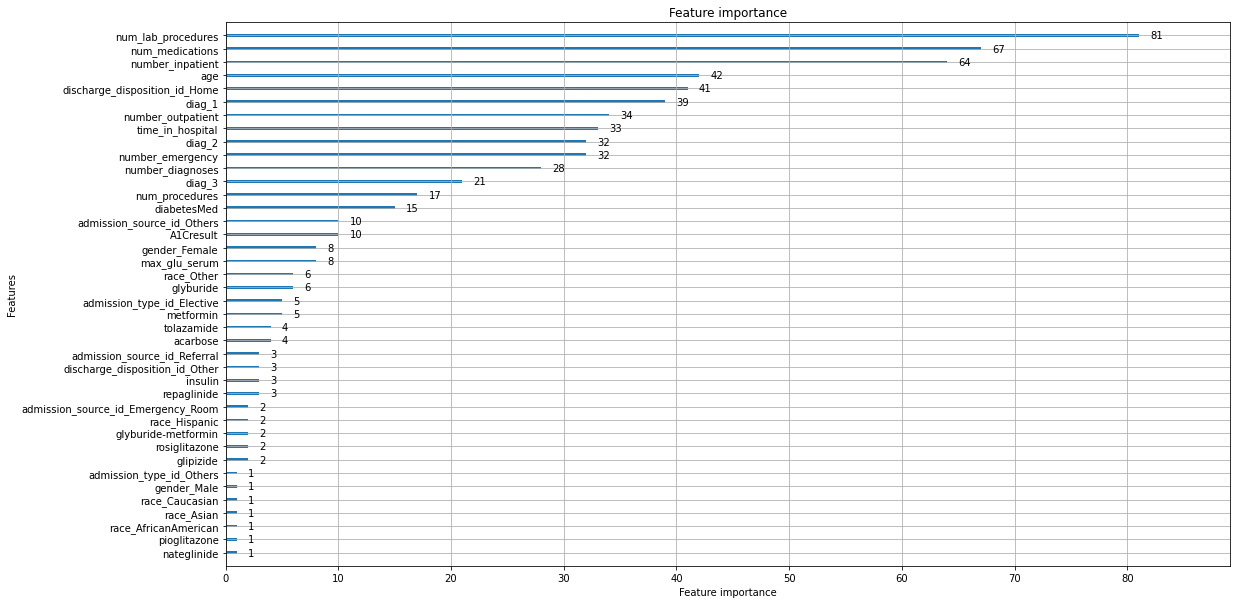

In [54]:
plt.rcParams["figure.figsize"] = (18, 10)
lgb.plot_importance(lgbm_model)

feature_imp = pd.Series(lgbm_model.feature_importances_, index = X_train.columns)
best_features = feature_imp.nlargest(30)
best_features = best_features.index.to_list()
print(best_features)

#### Observation
- The best_features selected by the model are: ( 'num_lab_procedures', 'num_medications', 'number_inpatient', 'age', 'discharge_disposition_id_Home', 'diag_1', 'number_outpatient', 'time_in_hospital', 'number_emergency', 'diag_2', 'number_diagnoses', 'diag_3', 'num_procedures', 'diabetesMed', 'A1Cresult', 'admission_source_id_Others', 'max_glu_serum', 'gender_Female', 'glyburide', 'race_Other', 'metformin', 'admission_type_id_Elective', 'acarbose', 'tolazamide', 'repaglinide', 'insulin', 'discharge_disposition_id_Other', 'admission_source_id_Referral', 'glipizide', 'rosiglitazone')

In [68]:
X_train = train_df[best_features] # Features of training data set(Containing the besr features selected by the LGBM classifier)
y_train = train_df.readmitted # Target variable
X_test = test_df[best_features]  # Features of test data set(Containing the besr features selected by the LGBM classifier)
y_test = test_df.readmitted # Target variable

### Combination of over- and under-sampling the training data

In [70]:
# Here I perform the combination of oversampling and undersampling method on the training data.
# method used to achieve this is SMOTEENN. 
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

#### Observation

- Due to presence of an imbalanced training dataset(more records of class 0 than class 1) I have performed a combination of oversampling and undersampling method on training data.
- The method used is SMOTEENN(SMOTE Edited nearest neighbors).
- The method is added to the pipeline after applying SMOTE over-sampling on the training data to obtain a cleaner space.
- After applying this method the class imbalance issue is handled.

### Building Models and evaluation

#### Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


dtclf = DecisionTreeClassifier(criterion="entropy",max_depth = 5)
#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Decision Tree Classifier", dtclf)
])
# Train Decision Tree Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)


# Predict the response for training dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))

# Predict the response for validation dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))


Training Set Accuracy: 0.7595949493686711
Test Set Accuracy: 0.6628493084398565


In [72]:
## Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.8928530192818381, 'recall': 0.7039279049656365, 'f1-score': 0.787214007584048, 'support': 21971}, '1': {'precision': 0.12999866256519996, 'recall': 0.3437057991513437, 'f1-score': 0.188646288209607, 'support': 2828}, 'accuracy': 0.6628493084398565, 'macro avg': {'precision': 0.5114258409235191, 'recall': 0.52381685205849, 'f1-score': 0.48793014789682754, 'support': 24799}, 'weighted avg': {'precision': 0.8058595066081556, 'recall': 0.6628493084398565, 'f1-score': 0.7189552265690505, 'support': 24799}}


Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=1))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=11))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=12))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=13))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=14))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=16))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=17))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=18))])

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=19))])

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Accuracy')

[0.6586323290411301, 0.6773596699587449, 0.7294161770221278, 0.7501062632829104, 0.7595949493686711, 0.7748218527315914, 0.7856982122765346, 0.7980747593449181, 0.810276284535567, 0.8225778222277784, 0.8354919364920615, 0.8497312164020503, 0.8645080635079385, 0.881335166895862, 0.8959494936867108, 0.9118639829978747, 0.9270033754219278, 0.9405425678209777, 0.9520690086260782]
[0.7010363321101657, 0.24049356828904392, 0.4165087301907335, 0.6073632001290374, 0.6628493084398565, 0.5401427476914392, 0.5838138634622364, 0.579297552320658, 0.6140973426347837, 0.6057099076575668, 0.6201862978345901, 0.6168393886850276, 0.6164764708254366, 0.6314770756885358, 0.640791967418041, 0.654340900842776, 0.6627283358199927, 0.6682930763337231, 0.6722851727892254]


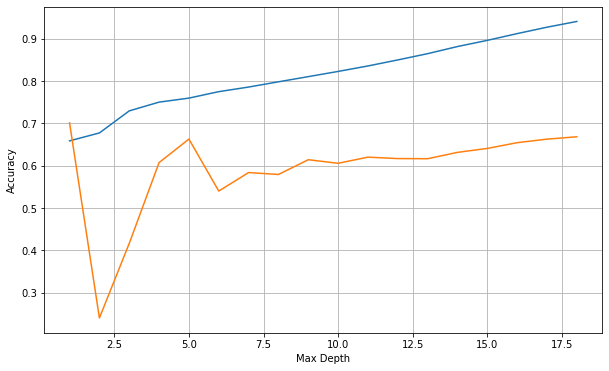

In [73]:
# We can iterate through different depth values to find the value that minimizes *test* error. 
# For each depth value, we learn a tree

clfs = []

max_depths = range (1,20)

for max_depth in max_depths:
    dtclf = DecisionTreeClassifier(criterion="entropy",max_depth = max_depth)
    pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Decision Tree Classifier", dtclf)
    ])
    pipeline.fit(X_resampled, y_resampled)
    clfs.append(pipeline)
    
# Lets find the one that has the maximum test set accuracy

#Accuracy scores of the training set for different values of max_depth
acc_scores_train = [metrics.accuracy_score(y_resampled, clf.predict(X_resampled)) for clf in clfs]
#Accuracy scores of the test set for different values of max_depth
acc_scores_test = [metrics.accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot between Training Set Accuracy/Validation Set Accuracy and max_depth
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(max_depths[:-1], acc_scores_train[:-1], label = "Training")
plt.plot(max_depths[:-1], acc_scores_test[:-1], label = "Test")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
print(acc_scores_train)
print(acc_scores_test)

In [75]:
dtclf = DecisionTreeClassifier(criterion="entropy",max_depth = 8)
#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Decision Tree Classifier", dtclf)
])
# Train Decision Tree Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)


# Predict the response for training dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))

# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))


Training Set Accuracy: 0.7980747593449181
Test Set Accuracy: 0.5792572281140369


In [76]:
## Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.8978550244844472, 'recall': 0.5925083064038961, 'f1-score': 0.7139018371264052, 'support': 21971}, '1': {'precision': 0.13077669902912623, 'recall': 0.4763083451202263, 'f1-score': 0.20521023765996346, 'support': 2828}, 'accuracy': 0.5792572281140369, 'macro avg': {'precision': 0.5143158617567867, 'recall': 0.5344083257620612, 'f1-score': 0.45955603739318435, 'support': 24799}, 'weighted avg': {'precision': 0.8103798236945907, 'recall': 0.5792572281140369, 'f1-score': 0.6558922462843915, 'support': 24799}}


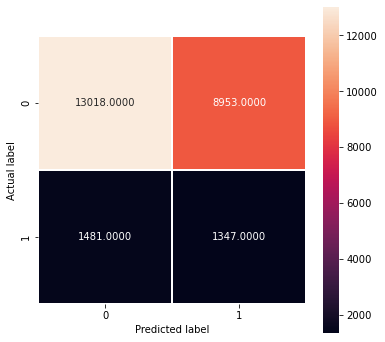

In [77]:
# Printing the confusion matrix
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

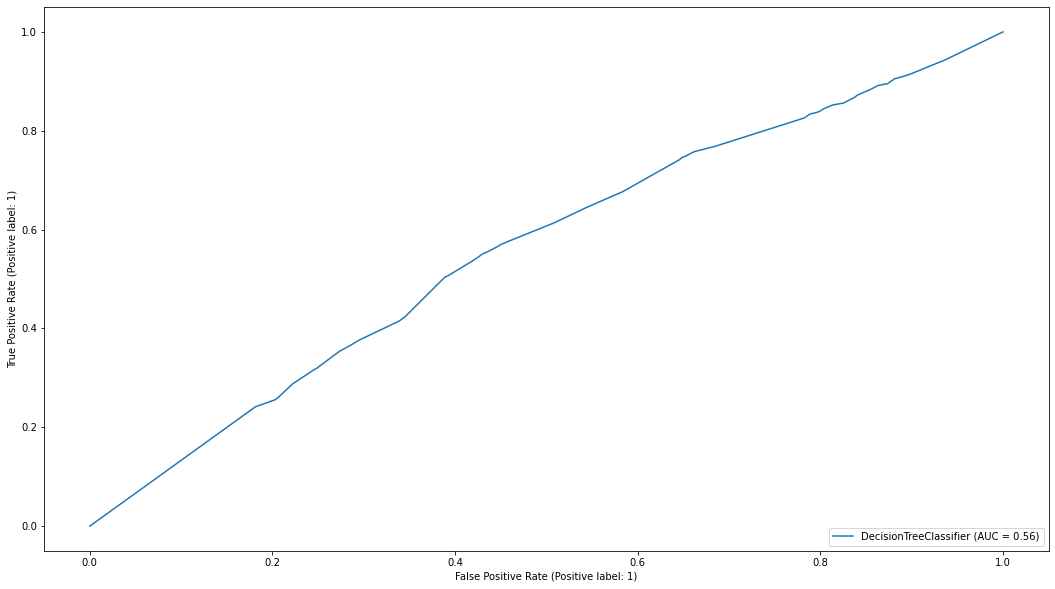

In [78]:
# Printing the ROC curve for the Decision tree classifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

roc_auc = roc_auc_score(y_test, dtclf.predict(X_test))
plot_roc_curve(dtclf, X_test, y_test)

### Observations:
- Ran the decision tree classifier for different values of hyperparameters
- below are some of the model performance evaluation metrics values we observed.
- when we used hyperparameters(criterion="entropy",max_depth = 5), we can see that the recall value for target class(1) is 0.34 and Test Set Accuracy is 0.66
- when we used hyperparameters(criterion="entropy",max_depth = 8), we can see that there's a rise in recall value for target class(1): 0.47 even though the Test Set Accuracy decreases to 0.58

| Hyperparameters | Train set Accuracy | Test set Accuracy | Precision for target class(1)|Recall for target class(1)|AUC|
| :--- | :--- | :--- | :--- | :--- | :--- |
| criterion="entropy",max_depth = 5 | 0.76 | 0.66 | 0.13 | 0.34 | 0.54 |
| criterion="entropy",max_depth = 8 | 0.80 | 0.58 | 0.13  |0.47 | 0.54 |

#### Logistic Regression Classifier

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Logistic Rogression", model)
])
# Training the Logistic Regression Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)
# Predict the response for training dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))
# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Set Accuracy: 0.8075259407425929
Test Set Accuracy: 0.619137868462438


C:\Users\swarn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.9002940048574716, 'recall': 0.6411178371489691, 'f1-score': 0.7489167131881862, 'support': 21971}, '1': {'precision': 0.13853381405003823, 'recall': 0.44837340876944837, 'f1-score': 0.2116684750855521, 'support': 2828}, 'accuracy': 0.619137868462438, 'macro avg': {'precision': 0.5194139094537549, 'recall': 0.5447456229592087, 'f1-score': 0.48029259413686914, 'support': 24799}, 'weighted avg': {'precision': 0.8134252674243726, 'recall': 0.619137868462438, 'f1-score': 0.6876506130488964, 'support': 24799}}


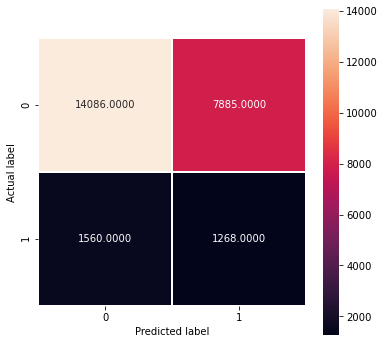

In [85]:
#Printing the confusion matrix
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01, penalty= 'l2', solver= 'liblinear')
#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Logistic Rogression", model)
])
# Training the Logistic Regression Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)
# Predict the response for training dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))
# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Set Accuracy: 0.7988373546693337
Test Set Accuracy: 0.6009516512762612


In [88]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.896968899993425, 'recall': 0.6209093805470848, 'f1-score': 0.7338353953738569, 'support': 21971}, '1': {'precision': 0.13149113660062564, 'recall': 0.4458981612446959, 'f1-score': 0.20309228539217264, 'support': 2828}, 'accuracy': 0.6009516512762612, 'macro avg': {'precision': 0.5142300182970253, 'recall': 0.5334037708958903, 'f1-score': 0.46846384038301475, 'support': 24799}, 'weighted avg': {'precision': 0.8096762222695314, 'recall': 0.6009516512762612, 'f1-score': 0.6733111195954705, 'support': 24799}}


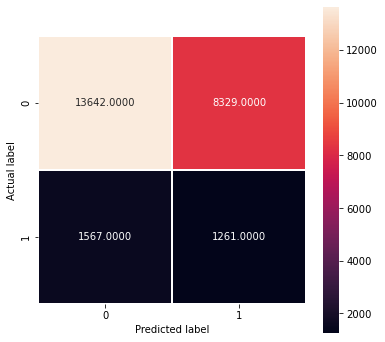

In [89]:
#Printing the confusion matrix
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

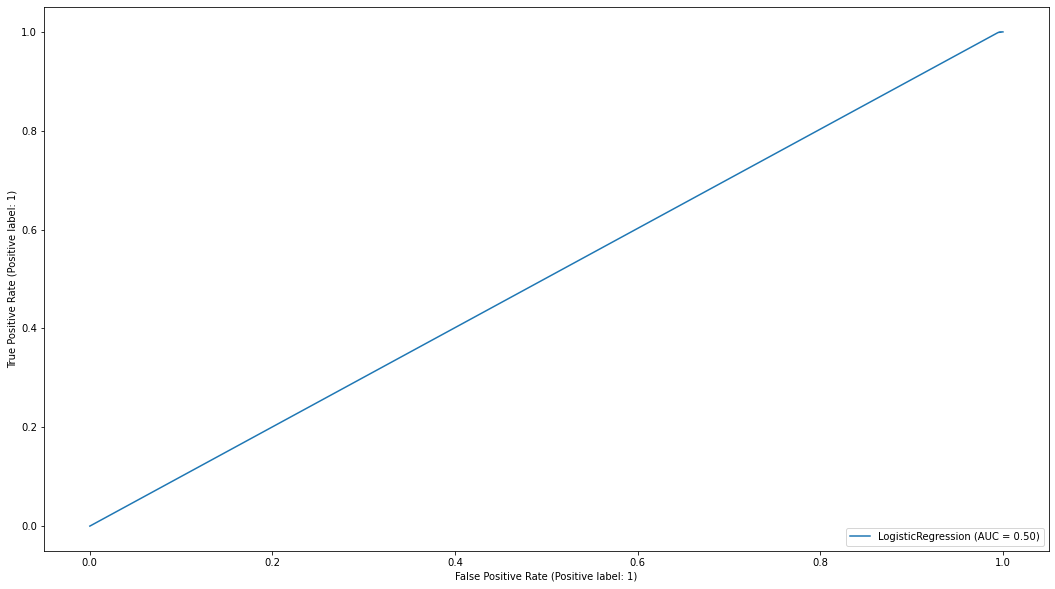

In [90]:
#ROC curve for Logistic Regression Classifier.
roc_auc = roc_auc_score(y_test, model.predict(X_test))
plot_roc_curve(model, X_test, y_test)

### Observations:
- Ran the Logistic regression classifier for different values of hyperparameters
- below are some of the model evaluation metrics values we observed.
- when we used no hyperparameters, we can see that the recall value for target class(1) is 0.45 and Test Set Accuracy is 0.62
- when we used hyperparameters(C = 0.01, penalty= 'l2', solver= 'liblinear'), we can see that there's no rise in recall value for target class(1): 0.47, the Test Set Accuracy decreases to 0.60 and Train Set Accuracy also decrease to 0.80

| Hyperparameters | Train set Accuracy | Test set Accuracy | Precision for target class(1)|Recall for target class(1)|AUC|
| :--- | :--- | :--- | :--- | :--- | :--- |
| No parameters| 0.81 | 0.62 | 0.14 | 0.45 | 0.50 |
| C = 0.01, penalty= 'l2', solver= 'liblinear'| 0.80 | 0.60 | 0.13  |0.45 | 0.50 |

## Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Random Forest", model)
])
# Train Random Forest Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)
# Predict the response for train dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))
# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Set Accuracy: 1.0
Test Set Accuracy: 0.7906770434291706


In [92]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.8920927189456959, 'recall': 0.8688270902553366, 'f1-score': 0.8803062095044848, 'support': 21971}, '1': {'precision': 0.15260217583063804, 'recall': 0.18352192362093353, 'f1-score': 0.16663991009792903, 'support': 2828}, 'accuracy': 0.7906770434291706, 'macro avg': {'precision': 0.522347447388167, 'recall': 0.5261745069381351, 'f1-score': 0.523473059801207, 'support': 24799}, 'weighted avg': {'precision': 0.8077635421268974, 'recall': 0.7906770434291706, 'f1-score': 0.7989219482551707, 'support': 24799}}


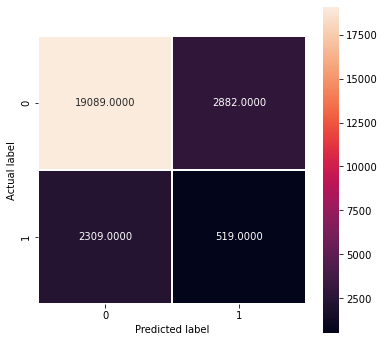

In [93]:
#Printing the confusion matrix
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = "entropy" , random_state = 42, max_depth= 8, max_features= 15)
#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Random Forest", model)
])
# Train Random Forest Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)
# Predict the response for train dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))
# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Set Accuracy: 0.8136392049006126
Test Set Accuracy: 0.6150247993870721


In [96]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.8957191998980761, 'recall': 0.6399799736015657, 'f1-score': 0.7465555231091878, 'support': 21971}, '1': {'precision': 0.13086474013844632, 'recall': 0.42114568599717117, 'f1-score': 0.19968144857071005, 'support': 2828}, 'accuracy': 0.6150247993870721, 'macro avg': {'precision': 0.5132919700182612, 'recall': 0.5305628297993684, 'f1-score': 0.4731184858399489, 'support': 24799}, 'weighted avg': {'precision': 0.8084976017610451, 'recall': 0.6150247993870721, 'f1-score': 0.684191722843257, 'support': 24799}}


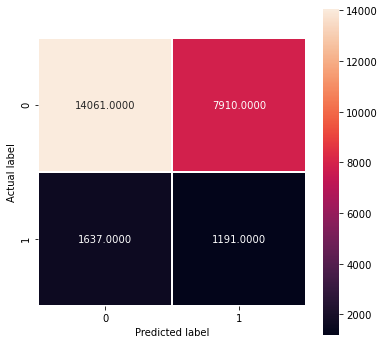

In [97]:
#Printing the confusion matrix
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


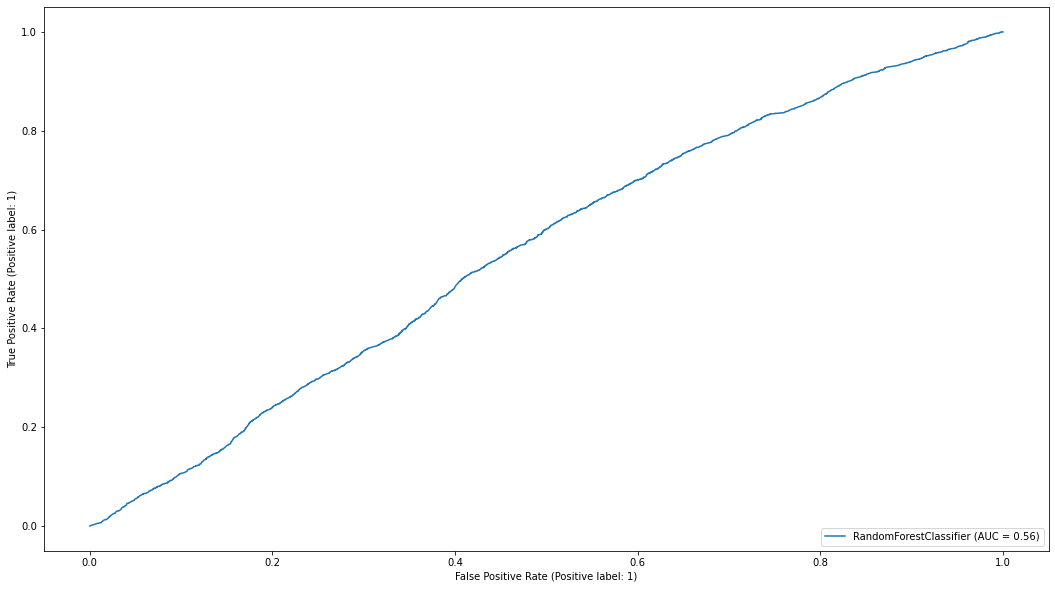

In [98]:
#ROC curve for Random Forest Classifier.
roc_auc = roc_auc_score(y_test, model.predict(X_test))
plot_roc_curve(model, X_test, y_test)

### Observations:
- Ran the Random Forest classifier for different values of hyperparameters
- below are some of the model evaluation metrics values we observed.
- when we used no hyperparameters, we can see that the recall value for target class(1) is 0.18 and Test Set Accuracy is 0.80
- when we used hyperparameters(criterion = "entropy" , random_state = 42, max_depth= 8, max_features= 15), we can see that there's a rise in recall value for target class(1): 0.42, the Test Set Accuracy decreases to 0.62 and Train Set Accuracy also decreases to 0.80

| Hyperparameters | Train set Accuracy | Test set Accuracy | Precision for target class(1)|Recall for target class(1)|AUC|
| :--- | :--- | :--- | :--- | :--- | :--- |
| No parameters| 1 | 0.80 | 0.15 | 0.18 | 0.54 |
| criterion = "entropy" , random_state = 42, max_depth= 8, max_features= 15 | 0.81 | 0.62 | 0.13  |0.42 | 0.54 |

### LightGBM classifier

In [99]:
# Training the LGBM classifier on the train data.
from lightgbm import LGBMClassifier
model = LGBMClassifier() #model is LGBM classifier

pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("LGBM", model)
])
# Train LGBM Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)
# Predict the response for train dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))
# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Set Accuracy: 0.8774596824603076
Test Set Accuracy: 0.7197870881890399


In [97]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.9032026768642447, 'recall': 0.687997815301989, 'f1-score': 0.781047355775441, 'support': 21971}, '1': {'precision': 0.14982016619124394, 'recall': 0.42715700141442714, 'f1-score': 0.22183454228261867, 'support': 2828}, 'accuracy': 0.6582523488850357, 'macro avg': {'precision': 0.5265114215277443, 'recall': 0.5575774083582081, 'f1-score': 0.5014409490290299, 'support': 24799}, 'weighted avg': {'precision': 0.8172893037369715, 'recall': 0.6582523488850357, 'f1-score': 0.717276484508144, 'support': 24799}}


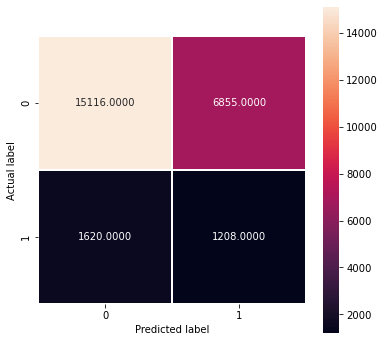

In [98]:
# Plotting the Confusion Matrix
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


In [101]:
# Training the LGBM classifier on the train data.
model = LGBMClassifier(n_estimators=200, subsample= 0.01) #model is LGBM classifier

pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("LGBM", model)
])
# Train LGBM Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)
# Predict the response for train dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))
# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Set Accuracy: 0.8979997499687461
Test Set Accuracy: 0.7309972176297431


In [102]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.8982300884955752, 'recall': 0.7853534204178235, 'f1-score': 0.8380078191398946, 'support': 21971}, '1': {'precision': 0.15619967793880837, 'recall': 0.30869872701555867, 'f1-score': 0.20743732921468452, 'support': 2828}, 'accuracy': 0.7309972176297431, 'macro avg': {'precision': 0.5272148832171918, 'recall': 0.5470260737166911, 'f1-score': 0.5227225741772896, 'support': 24799}, 'weighted avg': {'precision': 0.8136112731782422, 'recall': 0.7309972176297431, 'f1-score': 0.7660995427776021, 'support': 24799}}


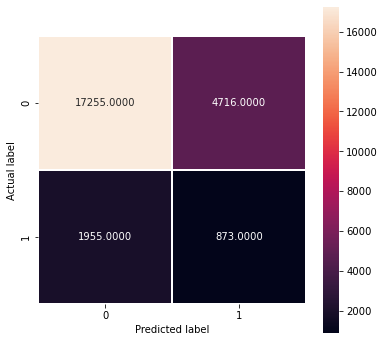

In [103]:
# Plotting the Confusion Matrix
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


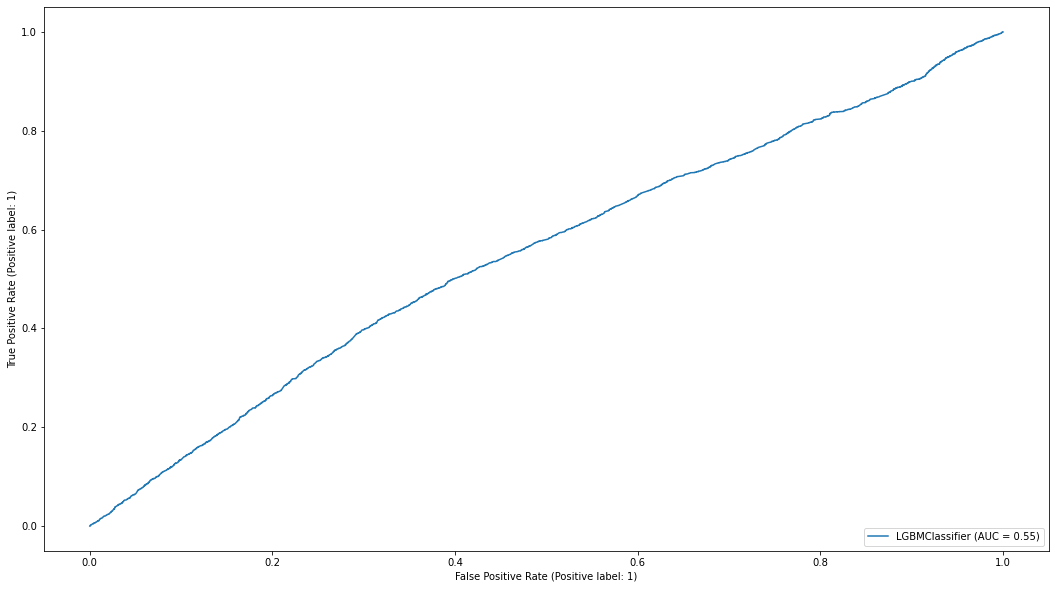

In [104]:
#ROC curve for LGBM classifier
roc_auc = roc_auc_score(y_test, model.predict(X_test))
plot_roc_curve(model, X_test, y_test)

### Observations:
- Ran the LGBM classifier for different values of hyperparameters
- below are some of the model evaluation metrics values we observed.
- when we used no hyperparameters, we can see that the recall value for target class(1) is 0.43 and Test Set Accuracy is 0.72
- when we used hyperparameters(n_estimators=200, subsample= 0.01), we can see that there's a decrease in recall value for target class(1): 0.31, the Test Set Accuracy increases to 0.73 and Train Set Accuracy also increases to 0.89.

| Hyperparameters | Train set Accuracy | Test set Accuracy | Precision for target class(1)|Recall for target class(1)|AUC|
| :--- | :--- | :--- | :--- | :--- | :--- |
| No parameters| 0.88 | 0.72 | 0.15 | 0.43 | 0.55 |
| n_estimators=200, subsample= 0.01| 0.89 | 0.73 | 0.16  |0.31 | 0.55 |

### Hyperparameter Tuning

#### Tuning of LightGBM Classifier

In [112]:
#Here I am trying to tune the hyperparameters of the LGBM classifier.
# for tuning the hyperparameters we are using scikit learn's grid search cv
#It helps to loop through predefined hyperparameters and fit our estimator (model) on the training set. 
#So, in the end, we can select the best parameters from the listed hyperparameters.


from sklearn.model_selection import GridSearchCV
lgbm=LGBMClassifier()
params = {"learning_rate":[0.01,0.1,0.05],
              "n_estimators": [100,200,500],
               "subsample":[0.1,0.2,0.4],
              "max_depth":[2,3,5,8,10]}


In [113]:
lgbm_cv_model=GridSearchCV(lgbm,params,cv=3,n_jobs=-1,verbose=2).fit(X_resampled,y_resampled)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [101]:
# we get the tuned parameters
lgbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.1}

In [106]:
# training the LGBM classifier on tuned parameters.
from lightgbm import LGBMClassifier
tuned_model = LGBMClassifier(learning_rate=0.05,max_depth=8,n_estimators=100,subsample=0.1) #model is LGBM classifier

#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("LGBM", tuned_model)
])
# Train LGBM Classifer 
pipeline = pipeline.fit(X_resampled,y_resampled)
# Predict the response for train dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))
# Predict the response for test dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Set Accuracy: 0.8580197524690586
Test Set Accuracy: 0.6905520383886447


In [107]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.8976912378303199, 'recall': 0.7344226480360475, 'f1-score': 0.807890652380714, 'support': 21971}, '1': {'precision': 0.14492966002344665, 'recall': 0.3497171145685997, 'f1-score': 0.20493162038955656, 'support': 2828}, 'accuracy': 0.6905520383886447, 'macro avg': {'precision': 0.5213104489268833, 'recall': 0.5420698813023236, 'f1-score': 0.5064111363851352, 'support': 24799}, 'weighted avg': {'precision': 0.8118486739350886, 'recall': 0.6905520383886447, 'f1-score': 0.7391310998797667, 'support': 24799}}


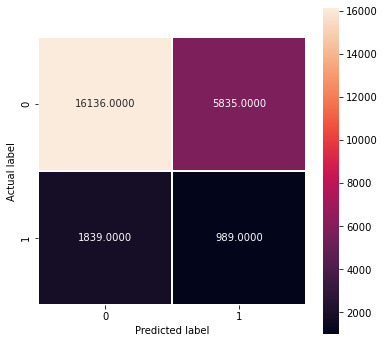

In [108]:
# Plotting the Confusion Matrix of the tuned LGBM model
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


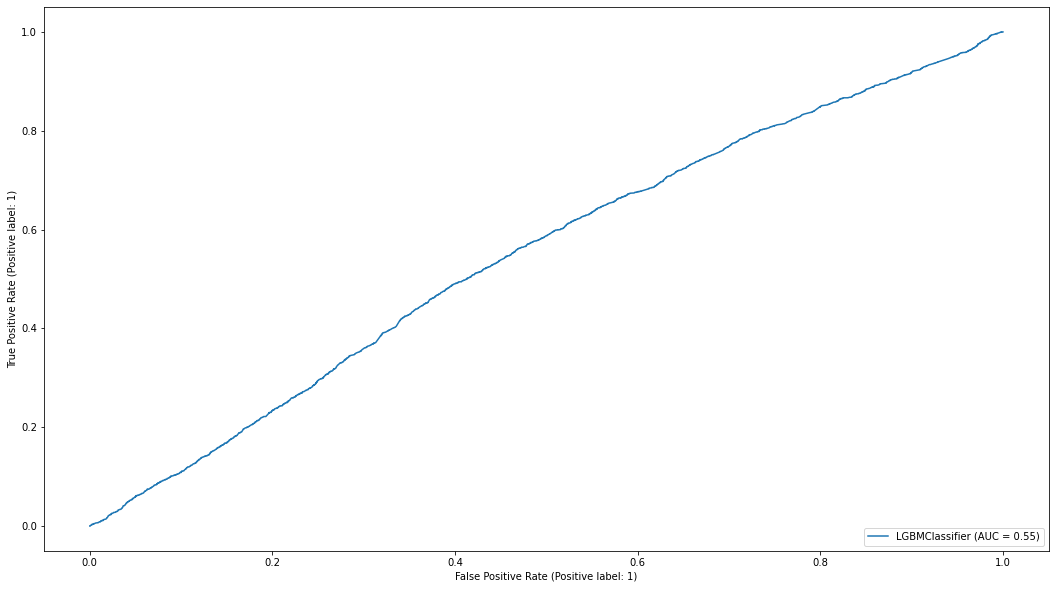

In [109]:
#ROC curve for the tuned LGBM classifer.
roc_auc = roc_auc_score(y_test, tuned_model.predict(X_test))
plot_roc_curve(tuned_model, X_test, y_test)

#### Tuning of Decision Tree classifier

In [114]:
# Here I am trying to Tune the hyperparameters of the Decision tree classifier.
dclf = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [2, 3, 5, 8, 10,11,15,20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dclf_cv_model = GridSearchCV(estimator=dclf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy").fit(X_resampled,y_resampled)
# list of the best parameters.
dclf_cv_model.best_params_

Fitting 4 folds for each of 80 candidates, totalling 320 fits


{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [110]:
#Running the classifier  based on the tuned hyperparameters
dtclf = DecisionTreeClassifier(criterion="gini",max_depth = 20,min_samples_leaf=5)
#pipeline containing both the MinMaxScaler() to normalize the input features of training data and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Decision Tree Classifier", dtclf)
])
# Train Decision Tree Classifer
pipeline = pipeline.fit(X_resampled,y_resampled)


# Predict the response for training dataset
y_pred = pipeline.predict(X_resampled)
print("Training Set Accuracy:",metrics.accuracy_score(y_resampled, y_pred))

# Predict the response for validation dataset
y_pred = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))


Training Set Accuracy: 0.9199899987498438
Test Set Accuracy: 0.6876486955119158


In [111]:
## Printing the classification report
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.8954684459271616, 'recall': 0.7330116972372673, 'f1-score': 0.8061367504254681, 'support': 21971}, '1': {'precision': 0.1391253302025242, 'recall': 0.3352192362093352, 'f1-score': 0.19663970130678282, 'support': 2828}, 'accuracy': 0.6876486955119158, 'macro avg': {'precision': 0.5172968880648429, 'recall': 0.5341154667233012, 'f1-score': 0.5013882258661254, 'support': 24799}, 'weighted avg': {'precision': 0.8092174547069805, 'recall': 0.6876486955119158, 'f1-score': 0.7366316230046995, 'support': 24799}}


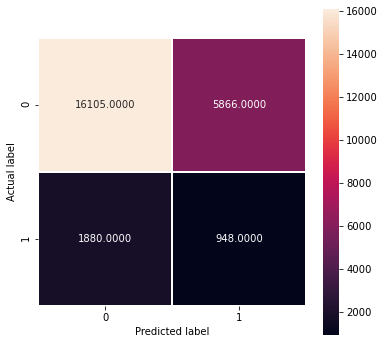

In [112]:
# Plotting the Confusion Matrix of the tuned Decision Tree model
c_mat = metrics.confusion_matrix(y_test, y_pred) #computing the confusion matrix 
plt.figure(figsize=(6,6))
sns.heatmap(c_mat, annot=True, fmt=".4f", linewidths=.6, square = True); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

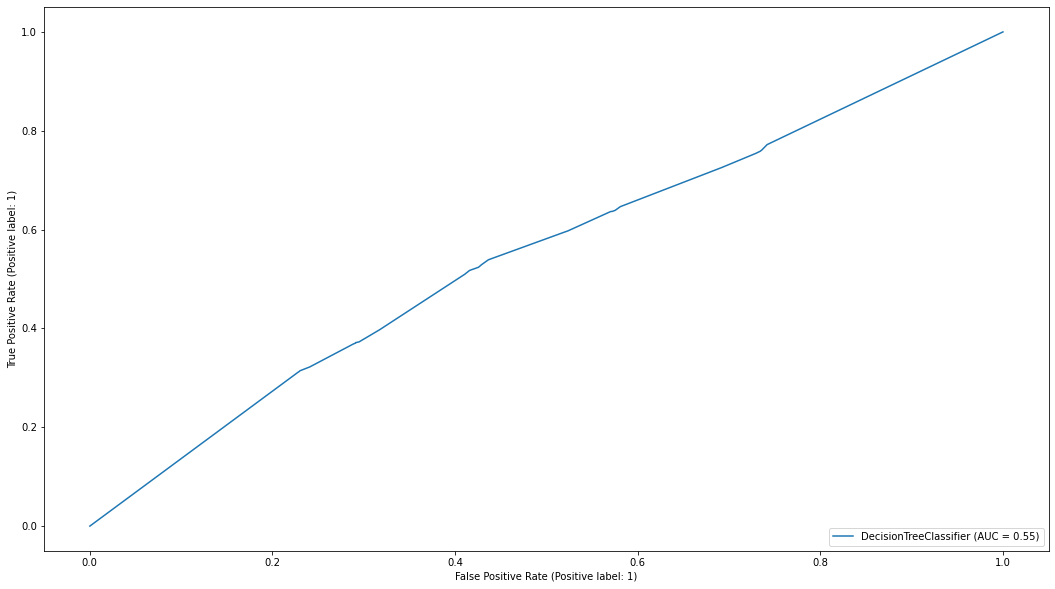

In [113]:
#ROC curve for the tuned LGBM classifer.
roc_auc = roc_auc_score(y_test, dtclf.predict(X_test))
plot_roc_curve(dtclf, X_test, y_test)

## Conclusion.

- AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 

- Have considered 0.5 as the threshold AUC score. 

- Based on my analysis of four machine learning algorithms: Logistic Regression, Decision Tree, Random Forest, and LightGBM, in terms of accuracy and AUC value for the ROC curve, the best model for this purpose has been found to be
- tuned LightGBM, which yielded an accuracy of 69.22% and AUC score of: 0.55.
- the parameters which were found after hyperparameter tuning are : {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.1}

- Some of the features which proved important for classification are: ( 'num_lab_procedures', 'num_medications', 'number_inpatient', 'age', 'discharge_disposition_id_Home', 'diag_1', 'number_outpatient', 'time_in_hospital', 'number_emergency', 'diag_2', 'number_diagnoses', 'diag_3', 'num_procedures', 'diabetesMed', 'A1Cresult', 'admission_source_id_Others', 'max_glu_serum', 'gender_Female', 'glyburide', 'race_Other', 'metformin', 'admission_type_id_Elective', 'acarbose', 'tolazamide', 'repaglinide', 'insulin', 'discharge_disposition_id_Other', 'admission_source_id_Referral', 'glipizide', 'rosiglitazone')



## References

- https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
- https://www.aapc.com/codes/icd9-codes-range/
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- https://pbpython.com/categorical-encoding.html
- https://www.w3schools.com/python/matplotlib_intro.asp
- https://elitedatascience.com/python-seaborn-tutorial
- https://imbalanced-learn.org/stable/combine.html
- https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
- https://medium.com/data-science-reporter/feature-selection-via-grid-search-in-supervised-models-4dc0c43d7ab1